# Lecture 12 
# Law of Large Numbers and the Central Limit Theorem

## Review of Lecture 11
We analyzed the coin flipping stochastic processes, and made some observations. Today, we'll look at the theorems that back up our observations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [3]:
# how to generate random 1's and -1's for 100 flips
N_flip = 100
# method 1 for loop
gain = np.zeros(N_flip)
for i in range(N_flip):
    flipping = random.random()
    if flipping < 0.5:
        # gain is +1.0 at this time step
        gain[i] = 1.0
    else:
        gain[i] = -1.0

print(gain[:10])

[-1.  1. -1.  1. -1.  1. -1.  1. -1. -1.]


In [5]:
# method 2 a vectorized np.random.random()
gain = np.zeros(N_flip)
flipping = np.random.random(size = N_flip)
gain = 1.0*(flipping < 0.5) - 1.0*(flipping > 0.5)

print(gain[:10])

[ 1.  1. -1. -1. -1.  1. -1. -1.  1.  1.]


In [13]:
# method 3: something new np.random.choice()
# simpliest if p = 0.5
gain = np.random.choice([-1.0, 1.0], size = N_flip)
print(gain[:10])

[ 1. -1. -1.  1. -1.  1.  1. -1.  1. -1.]


In [11]:
# remark, what if we have a biased coin with p = 0.6
gain_bias = np.random.choice([-1.0, 1.0], size= N_flip, p = [0.4, 0.6])
# 0.4 is the probability to get -1.0
# 0.6 is the probability to get 1.0

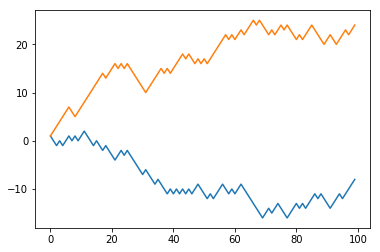

In [15]:
# how to get a stochastic process out 
money = np.cumsum(gain)
money_biased = np.cumsum(gain_bias)
plt.plot(money)
plt.plot(money_biased)

Let's say we have a probability distribution that gets us some random $X$'s. We can then get a new probability distribution that takes a bunch of random $X$'s and gives the average:

$$Y_n = \frac{X_1 + X_2 + ... + X_n}{n},$$

How are the $Y_n$'s distributed? 

For example, in Lecture 11, each $X_i$ represent the flipping result at $i$-th step. If it's heads, I win 1 dollar so $X_i=1$; if it's tails I lose 1 dollar, so $X_i = -1$. If I play this flipping game $n$ times, my average winning per game is $Y_n$. It's pretty clear that on average, I should break even, but how likely is it for my average winning per game will be high? What's the distribution of my per-game winnings if I play 100 games of coin-flipping?

Let's take 1000 $Y_1$'s, 1000 $Y_2$'s, 1000 $Y_3$'s, ... and see what we get. Let's start by plotting the mean of each one. 

Let's design our experiment a little more carefully so that we can get the most information:

* We are going to sample $Y_n$ 1000 times for $n=1,2,3,...,200$
* We will plot the histogram of how $Y_n$ is distributed sometimes
* We will record the mean each time.
* We will record the standard deviation each time.

In [16]:
# This is the histograam fitting function hist_and_fit from last time. 
# a random variable's histogram is plotted, then we fit it using normal distribution.
from math import sqrt, pi, e

def hist_and_fit(X, num_bins):
    # calculate mean and standard deviation. 
    mu = np.mean(X)
    sigma = np.std(X)
    
    Z = np.linspace(-1,1,300)
    plt.axis([-50,50,0,0.1])
    plt.hist(X, num_bins, density=True, edgecolor = 'black')  
    guassian_func = lambda mu, sigma: lambda x: 1/(sqrt(2*pi)*sigma) * e**(-0.5*(x - mu)*(x-mu)/(sigma * sigma))
    plt.plot(Z, guassian_func(mu, sigma)(Z))

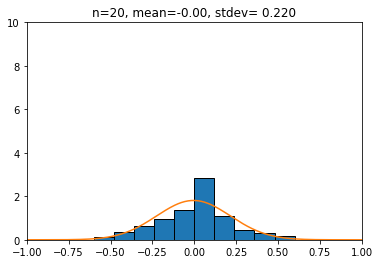

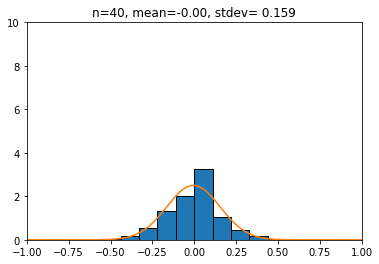

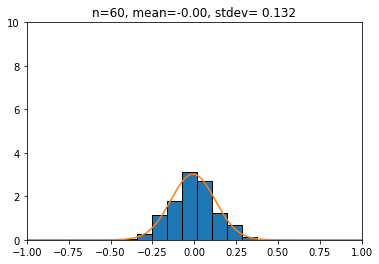

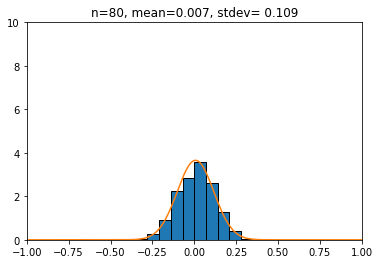

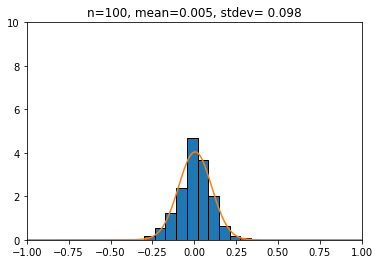

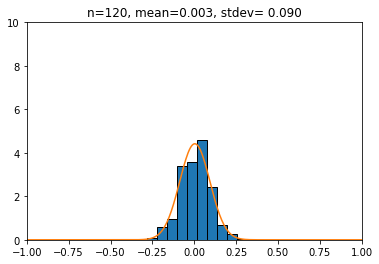

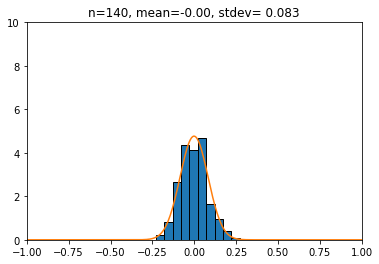

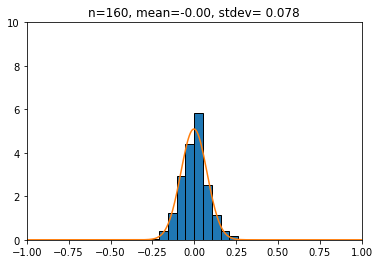

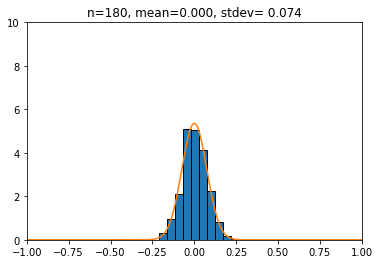

In [19]:
## generate the stochastic processes
random.seed('SeedCanBeAStringYo')
N = 1000
max_n = 200
means = np.zeros(max_n) # initialization
stdevs = np.zeros(max_n) # for large max_n, np.empty() will be faster

for n in range(1, max_n):
    # Y_n is the average winning for n flippings for N = 1000 simulations
    Y_n = np.zeros(N)
    for i in range(N):
        Y_n[i] = np.sum(np.random.choice([-1,1], size= n)) / n # average gain at each n
    means[n] = np.mean(Y_n)
    stdevs[n] = np.std(Y_n)
    if n % 20 == 0:
        plt.figure()
        plt.title("n=" + str(n) + ", mean=" + str(means[n])[:5] +  ", stdev= " + str(stdevs[n])[:5])
        hist_and_fit(Y_n, 10)
        plt.axis([-1,1,0,10])
        plt.show()

# In-class exercise
Vectorize the code above, no `for` should be used.

In [ ]:
# vectorized version of the code above here
## YY_n represent the average winning for all N simulations at each time step n


In [ ]:
## plot
for n in range(1, max_n):    
    if n % 20 == 0:
        plt.figure()
        plt.title("n=" + str(n) + ", mean=" + str(means[n])[:5] +  ", stdev= " + str(stdevs[n])[:5])
        hist_and_fit(YY_n[:,n], 10)
        plt.axis([-1,1,0,10])
        plt.show()

Observations:
* Looks like the distribution of $Y_n$'s is centered at zero. 
* The distribution of $Y_n$'s is looking sharper and sharper, more and more likely to be concentrated at zero as $n$ increases.
* The distribution of $Y_n$'s is looking more and more like a normal distribution

If we take $n \rightarrow \infty$...

## **Theorem**: (Law of large numbers) 
If we have $X_1,...,X_n$ from the same probability distribution $X$, and look at the probability distribution of the average:

$$Y_n = \frac{X_1 + X_2 + ... + X_n}{n},$$

then, as $n$ goes to infinity, $Y_n$ approaches the constant probability distribution that always gives $\mu$, the mean of $X$ the probability 1.
In other words, the probability 

$$P\Big(\lim_{n\rightarrow \infty} Y_n = \mu \Big) = 1$$

<br>

*Remark*: This is regardless of what probability density $X$ has. 

Let's see if that's really happening. Is the mean of our 1000 samlings of y_n really going to the mean of x as $n$ increases?

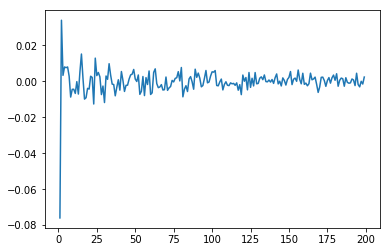

In [21]:
plt.plot(range(1,max_n), means[1:])

What about standard deviation?

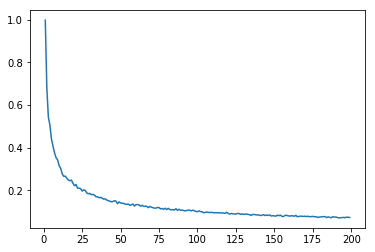

In [22]:
plt.plot(range(1,max_n), stdevs[1:]) # this is st dev of Y_n, avg gain

It looks like standard deviation is also going to 0. Does that make sense?

It looks like going to zero very nicely though. Could it be $1/n$?

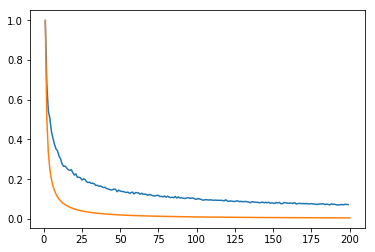

In [23]:
plt.plot(range(1,max_n), stdevs[1:])
plt.plot(range(1,max_n+1), 1 / np.array(range(1,max_n+1)))

Not quite. How about $\frac{1}{\sqrt{n}}$?

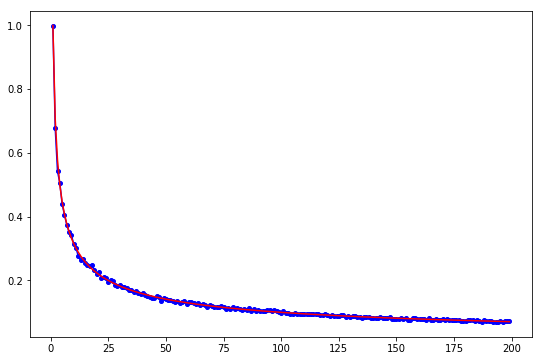

In [24]:
plt.figure(figsize=(9,6))
plt.plot(range(1,max_n), stdevs[1:], 'bo-', markersize = 4)
plt.plot(range(1,max_n), 1 / np.sqrt(np.array(range(1,max_n))), 'r', linewidth = 1.5)

Whoa? Perfect fit. So as $n\rightarrow \infty$, the mean of the nth average is going to 0 (the mean of the original distribution) and the standard deviation is going to $\frac{1}{\sqrt{n}}$.

## **Central Limit Theorem** 
Let $X_n$ be coming from a probability distribution with mean $\mu$ and standard deviation $\sigma$, and let

$$Y_n = \frac{X_1 + X_2 + ... + X_n}{n},$$

be the average. As $n \rightarrow \infty$, the distribution of $Y_n$ approaches the normal distribution:

$$N\left(\mu, \Big(\frac{\sigma}{\sqrt{n}} \Big)^2\right)$$

with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

Note that this is independent of the original shape of $X$. This means that if you have many many things averaging out, you are certain to get a normal distribution! That's why normal distribution is the most standard distribution.

## In-class exercise
Now suppose the coin is a biased one with $p = 0.6$.
Repeat the simulations above using
> `np.random.choice([-1, 1], size=n, p=[0.6, 0.4])`

In [ ]:
# code here
